# Install & Download Requirements


### Install Kaggle API

The first step, as always, is to obtain the data. So, we start by installing the Kaggle API and then download the information.

In [ ]:
!pip install -q kaggle

Upload kaggle.json

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"phdez14","key":"acf6771dbe7b8fc7f66857a00d5619d9"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

If API version <  1.5.9 reinstall

In [ ]:
!kaggle --version

Kaggle API 1.5.4


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle --version

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=7a69e35b4adc6997eb6cbd72c2b5017ea6d702f7c57ac85199edf4f5831993b0
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9
Kaggle API 1.5.10


If sklearn version <  0.23.2 reinstall

In [ ]:
!pip list | grep scikit-learn

scikit-learn                  0.22.2.post1   


In [ ]:
!pip install --upgrade --force-reinstall --no-deps scikit-learn
!pip list | grep scikit-learn

     |████████████████████████████████| 6.8MB 6.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
scikit-learn                  0.23.2         


In [ ]:
%cd
!git clone --recursive https://github.com/microsoft/LightGBM 
%cd LightGBM
!mkdir build 
%cd build
!cmake ..
!make -j4

/root
Cloning into 'LightGBM'...
remote: Enumerating objects: 20832, done.
remote: Total 20832 (delta 0), reused 0 (delta 0), pack-reused 20832
Receiving objects: 100% (20832/20832), 16.14 MiB | 22.18 MiB/s, done.
Resolving deltas: 100% (15219/15219), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/root/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 19.14 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
/root/LightGBM
/root/LightGBM/build
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C c

### Download data from kaggle

Create data directory and download data.


In [ ]:
!mkdir /content/data

In [ ]:
%cd /content/data
!kaggle competitions download -c predict-volcanic-eruptions-ingv-oe

/content/data
100% 9.45G/9.47G [02:27<00:00, 122MB/s]
100% 9.47G/9.47G [02:27<00:00, 68.7MB/s]


Unzip downloaded file

In [ ]:
!unzip /content/data/predict-volcanic-eruptions-ingv-oe.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/762802287.csv      
  inflating: test/763399656.csv      
  inflating: test/763412178.csv      
  inflating: test/764592471.csv      
  inflating: test/765116390.csv      
  inflating: test/765173266.csv      
  inflating: test/765224352.csv      
  inflating: test/765388699.csv      
  inflating: test/765687413.csv      
  inflating: test/766124910.csv      
  inflating: test/766202079.csv      
  inflating: test/766337533.csv      
  inflating: test/766739031.csv      
  inflating: test/767529410.csv      
  inflating: test/767647284.csv      
  inflating: test/768744818.csv      
  inflating: test/769004776.csv      
  inflating: test/769353991.csv      
  inflating: test/769421932.csv      
  inflating: test/769716639.csv      
  inflating: test/76993562.csv       
  inflating: test/769998386.csv      
  inflating: test/770206605.csv      
  inflating: test/770234713.csv      
  inflating: test/770323981.csv      

# Setting Work Directory

We start importing the Python's modules that we will need later. Also, we establish our workspace paths.


In [ ]:
%cd /content
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

%matplotlib inline
plt.style.use('ggplot')

/content


In [ ]:
data_root = '/content/data/'
train_dir = data_root + 'train/'
test_dir = data_root + 'test/'

train_df = pd.read_csv(data_root + 'train.csv')
test_df = pd.read_csv(data_root + 'sample_submission.csv')

# Exploratory Data Analysis

Once we have the data in our working directory, we begin by executing an exploratory analysis. But, before we start, let's talk about its structure.

The information provided by the INGV is made up of a total of 8,951 csv files, a little more than 58 GB on disk.

These are organized in two folders:
* train/: 4431 files
* test/: 4520 files

Each file contains ten minutes of readings taken by ten different sensors installed around a volcano. In total, each file contains 60,001 records; that is, 100 readings are received per second.

In addition, we have a metadata file for train csv's[link text](https://).


## Metadata File

`train.csv` is the metadata file, it contains the following columns:
* segment_id: ID code for the data segment. Matches the name of the associated data file.
* time_to_eruption: The target value, the time until the next eruption.

*italicized text*


In [ ]:
df = pd.read_csv(data_root + 'train.csv')
df

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


## Data File Example

As we check one of the segments, it is clear some sensor lectures are missing; then, we will need to clean data so we could implement machine learning algorithms. 

In [ ]:
df = pd.read_csv(train_dir + os.listdir(train_dir)[1])
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,-109.0,NaN,99.0,66.0,-171.0,1830.0,-84.0,-312.0,35.0,-37.0
1,-97.0,NaN,104.0,76.0,-65.0,1992.0,-81.0,-609.0,48.0,-26.0
2,-33.0,NaN,102.0,35.0,50.0,2002.0,-91.0,-234.0,68.0,11.0
3,13.0,NaN,124.0,6.0,91.0,1751.0,-145.0,-410.0,83.0,43.0
4,2.0,NaN,128.0,-76.0,159.0,1574.0,-249.0,-267.0,98.0,121.0
...,...,...,...,...,...,...,...,...,...,...
59996,-66.0,NaN,-83.0,-392.0,-8.0,-173.0,-45.0,-46.0,-66.0,118.0
59997,-35.0,NaN,-32.0,-444.0,24.0,-231.0,314.0,356.0,-61.0,279.0
59998,23.0,NaN,23.0,-449.0,73.0,-365.0,431.0,267.0,-82.0,361.0
59999,46.0,NaN,35.0,-383.0,77.0,-410.0,400.0,312.0,-87.0,419.0


## Sensors visualizations

Checking all the sensors againts each other in other to find relationships between them, using a segment with no missing lectures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f181fb5c048>,
      dtype=object)

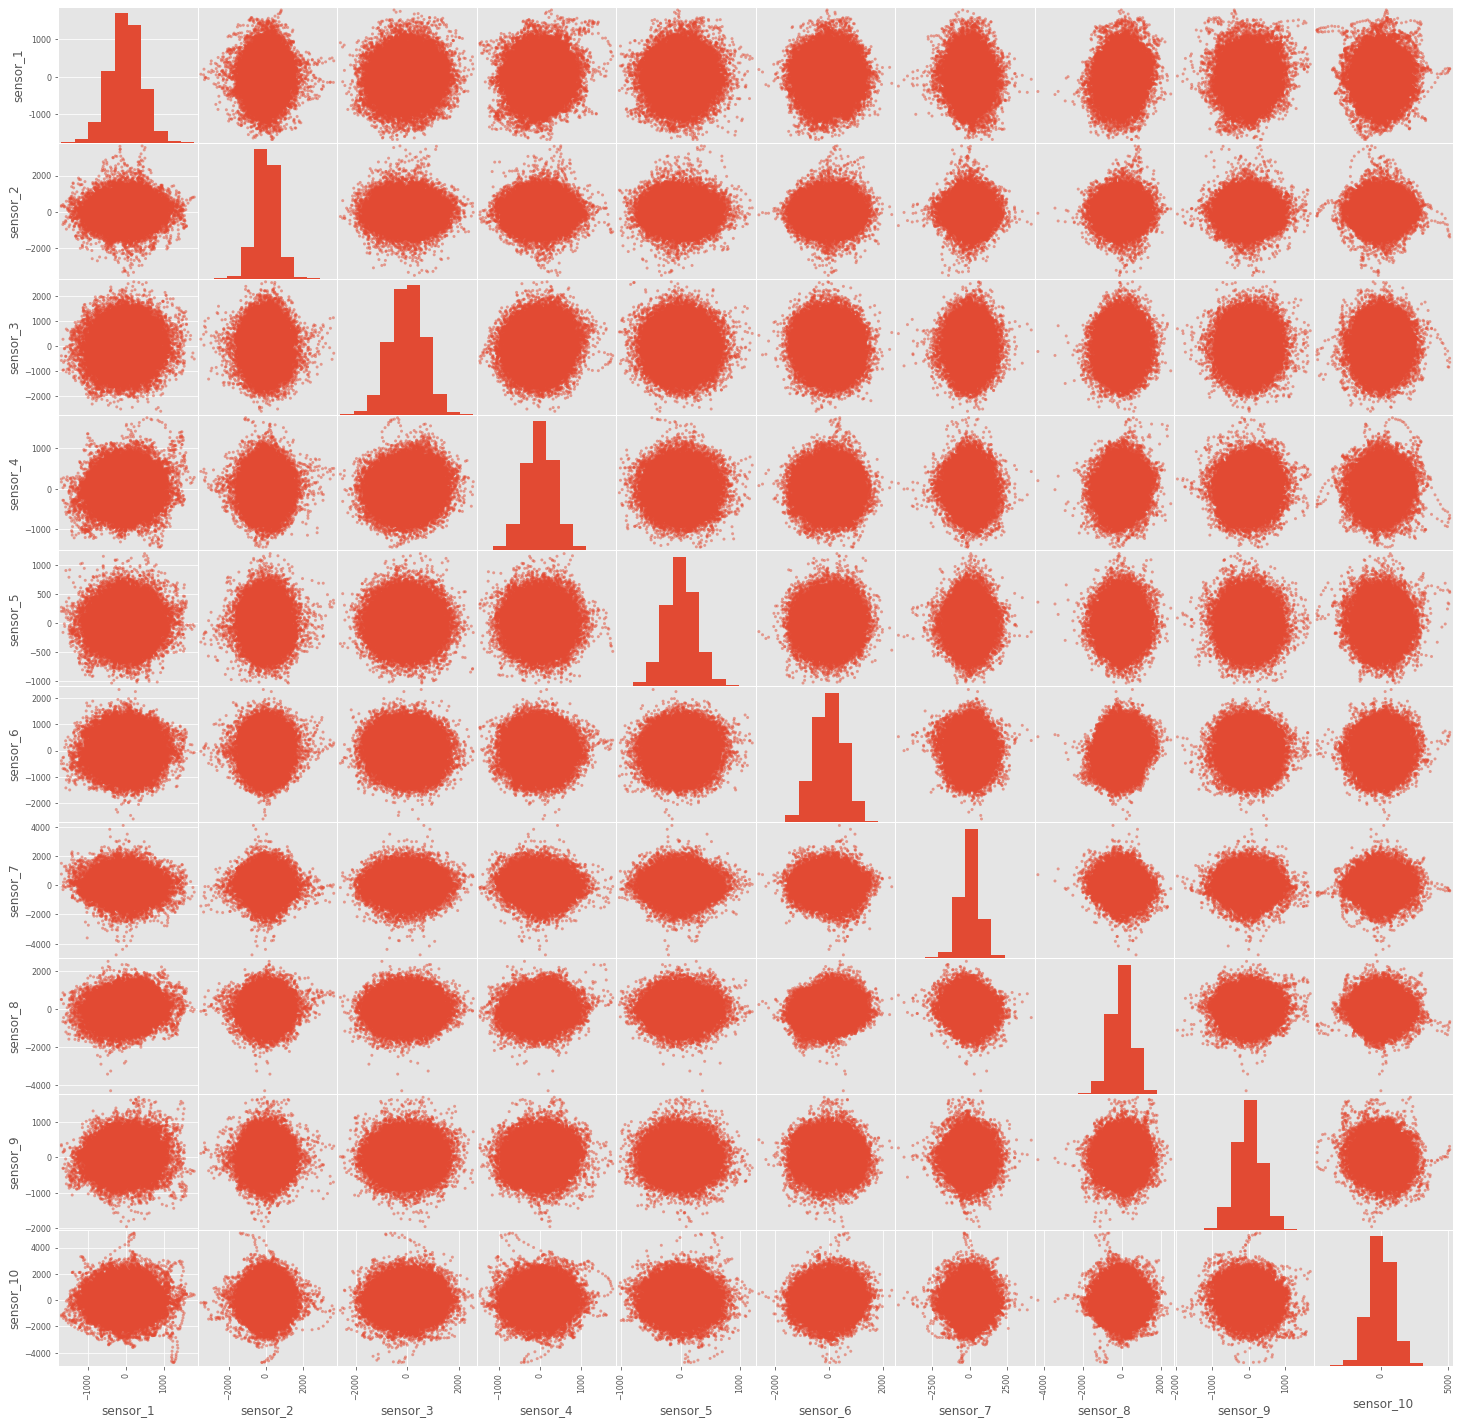

In [ ]:
segment = ''
for seg in pd.read_csv(data_root + 'train.csv')['segment_id']:
    segment = pd.read_csv(train_dir + str(seg) + '.csv')
    if not segment.isnull().values.any():
        break
        
pd.plotting.scatter_matrix(segment, figsize=(25,25))

## Discrete Fourier Transform Sample Frequencies

We obtain Fourier Transform frequencies for each sensors reads

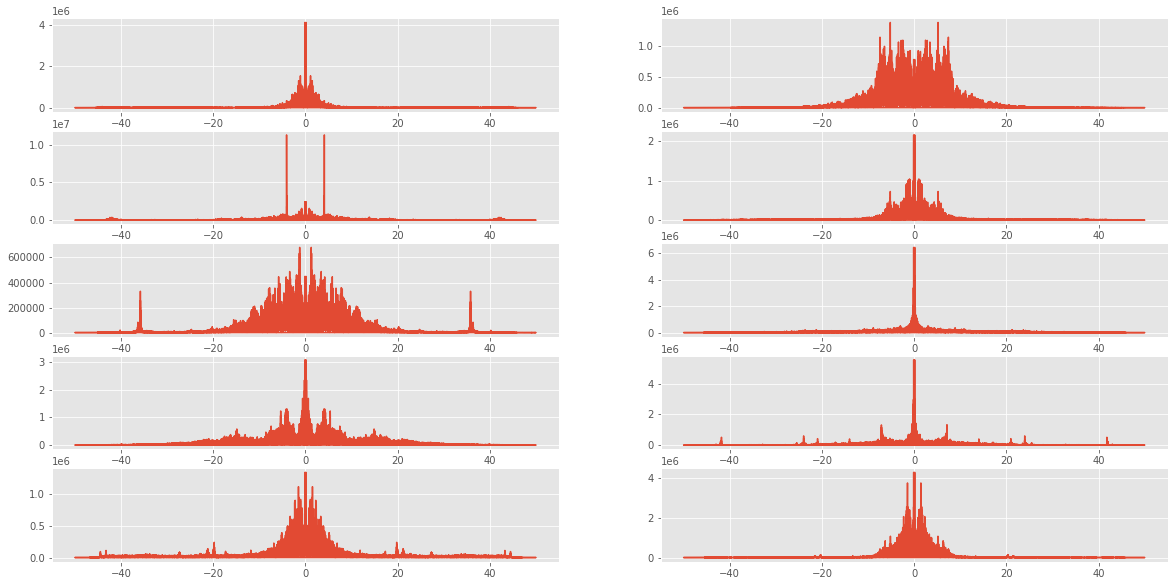

In [ ]:
from scipy.fft import fft, fftfreq
figure = plt.figure(figsize=(20, 10))
for s in range(1,11):
    ax = plt.subplot(5, 2, s)
    y = np.array(df['sensor_' + str(s)].fillna(0))
    yf = fft(y)
    xf = fftfreq(y.size, d=1e-2)
    ax.plot(xf, np.abs(yf))

In [ ]:
pd.Series([1,2,3,5,4], index=['a','b','c','d','e']).append(pd.Series([1],index=['f']))

a    1
b    2
c    3
d    5
e    4
f    1
dtype: int64

## Missing values
Remember that previous steps showed us there are segments with missing data. This section contains the analysis and distribution of the missing data within each sensor


In [ ]:
import seaborn as sns
import functools

def get_missing(seg):
    # Format seg and read csv
    seg = str(seg)
    try:
      seg_df = pd.read_csv(train_dir + seg + '.csv')
    except FileNotFoundError:
      seg_df = pd.read_csv(test_dir + seg + '.csv')
    
    #print(seg)
    return seg_df.isnull().sum().rename(seg)
    
def plot_missing(missing_sensors):
  
  sensors = ['sensor_' + str(i) for i in range(1,11)]

  sensors_miss = pd.melt(missing_sensors)

  plt.figure(figsize=(15,8))

  sns.scatterplot(y=sensors_miss['variable'], x=sensors_miss['value'])

  # Add title
  plt.title("Missing Values, by Sensor")

In [ ]:
train_missing_sensors = train_df['segment_id'].apply(get_missing)

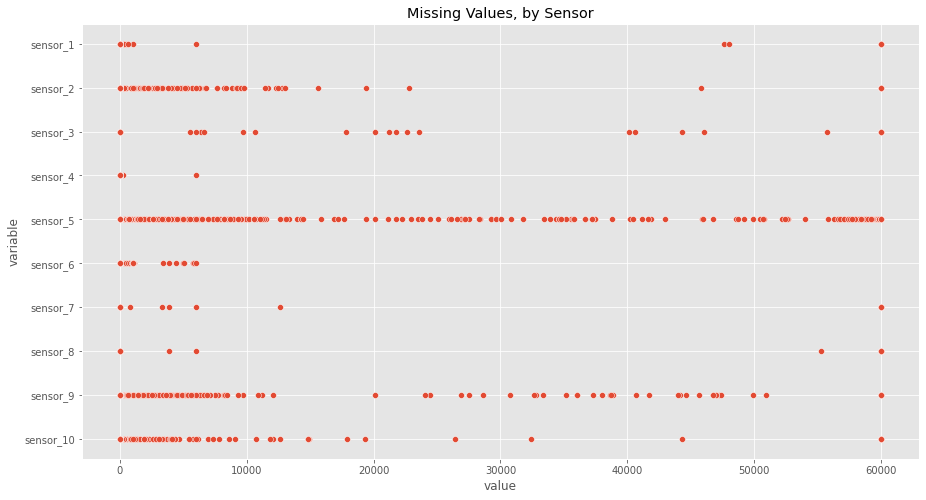

In [ ]:
plot_missing(train_missing_sensors)

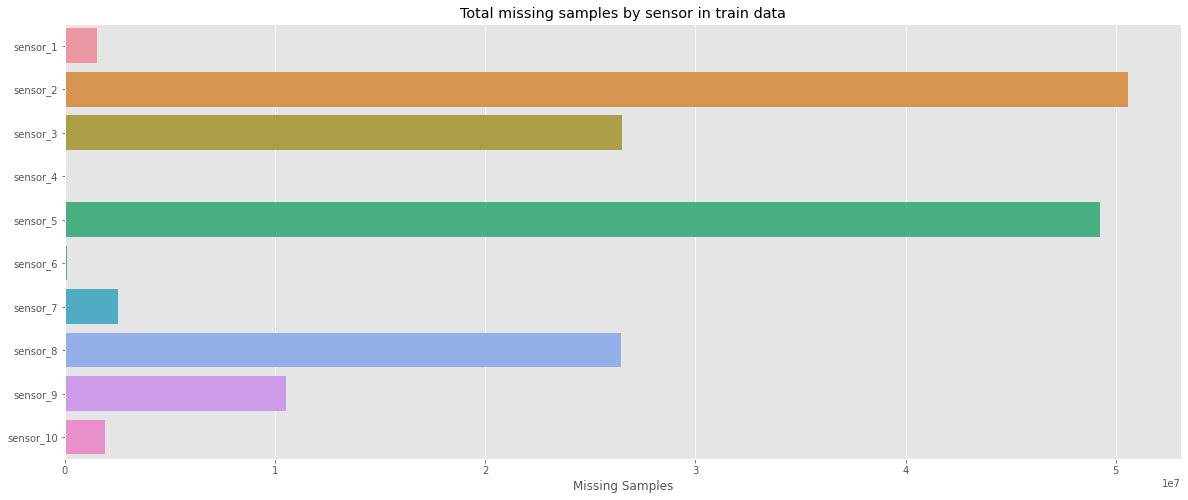

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Total missing samples by sensor in train data')
plt.xlabel('Missing Samples')
sns.barplot(y = train_missing_sensors.columns, x = train_missing_sensors.sum())

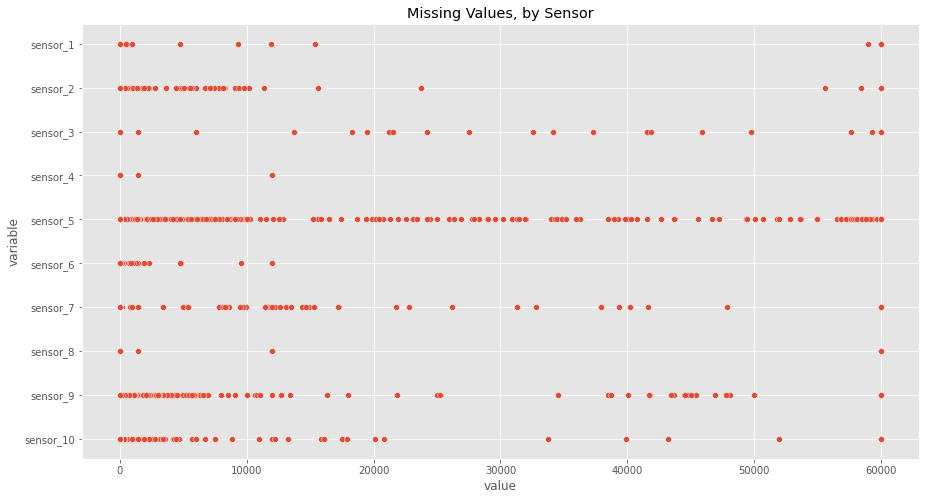

In [ ]:
test_missing_sensors = test_df['segment_id'].apply(get_missing)
plot_missing(test_missing_sensors)

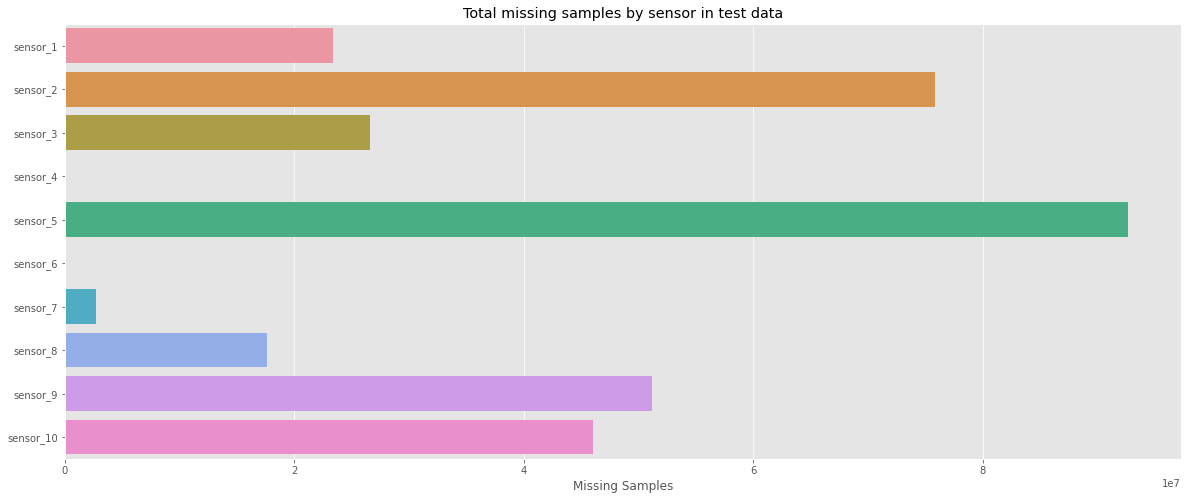

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Total missing samples by sensor in test data')
plt.xlabel('Missing Samples')
sns.barplot(y = test_missing_sensors.columns, x = test_missing_sensors.sum())

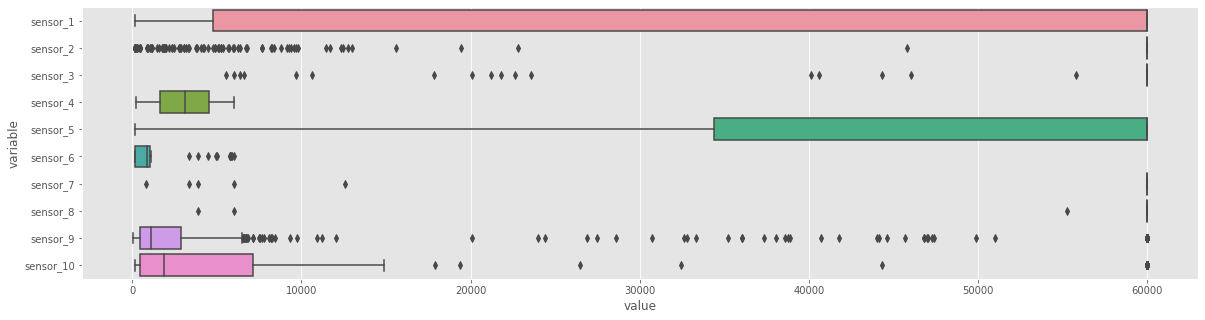

In [ ]:
plt.figure(figsize=(20,5))
train_points_missing = pd.melt(train_missing_sensors)[pd.melt(train_missing_sensors)['value'] != 0]
sns.boxplot(x="value", y="variable", data=train_points_missing)


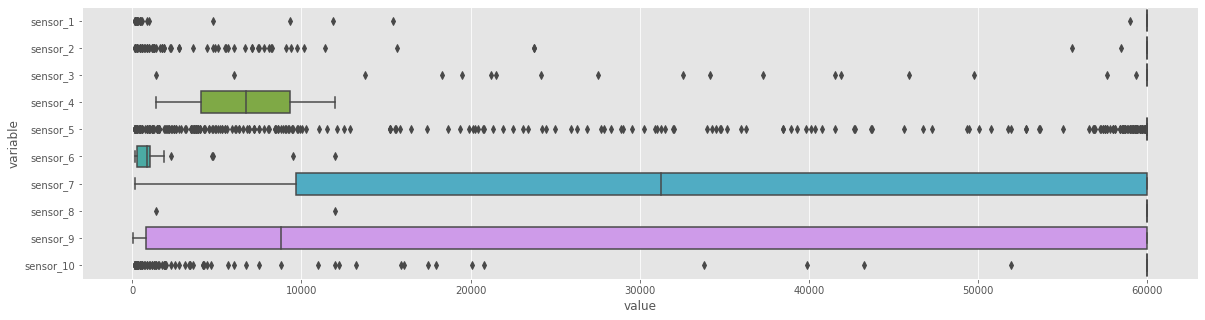

In [ ]:
plt.figure(figsize=(20,5))
test_points_missing = pd.melt(test_missing_sensors)[pd.melt(test_missing_sensors)['value'] != 0]
sns.boxplot(x="value", y="variable", data=test_points_missing)

# Data Preproccesing

We cannot feed machine learning algorithms with raw data and even less in this cases where are so many missing values.

Besides, even if we didn't have that problem, recall that we need to identify patterns which are not evident at all, thus raw data is not enough.

In the following cells we are going to obtain relevant features from sensors reads and we will take care of NaN values.

## Statistical features

We will begin getting statistical features, such as minimum and maximum values, medians, means and standard deviations.

In [ ]:
import functools

stat_feats = [
    np.nanmin,
    np.nanmax,
    np.nanmedian,
    np.nanmean,
    np.nanstd,
]

def get_stat_features(seg):
    
    """
        Returns a Series of different features from the csv.
    """
    
    # Format seg and read csv
    seg = str(seg)
    if not seg.endswith('.csv'): seg += '.csv'

    try:
      seg_df = pd.read_csv(train_dir + seg)
    except FileNotFoundError:
      seg_df = pd.read_csv(test_dir + seg)

    seg_df = seg_df.fillna(0)
    
    # Apply each func to each column and append in a Series for each func
    feats_series = [seg_df.apply(f).rename(index=lambda n : f"{n}_{f.__name__}")
                                                                for f in stat_feats]
    
    # Return appended Series
    return functools.reduce(pd.Series.append, feats_series)


In [67]:
#train_data = train_df['segment_id'].apply(get_stat_features)
#train_data = train_df.join(train_data)

train_data = pd.read_csv('train_data.csv')
train_data = train_data[[col for col in train_data.columns if 'fft' not in col]]

Now, we have 50 features for each segment.



In [68]:
train_data

,segment_id,time_to_eruption,sensor_1_nanmin,sensor_2_nanmin,sensor_3_nanmin,sensor_4_nanmin,sensor_5_nanmin,sensor_6_nanmin,sensor_7_nanmin,sensor_8_nanmin,sensor_9_nanmin,sensor_10_nanmin,sensor_1_nanmax,sensor_2_nanmax,sensor_3_nanmax,sensor_4_nanmax,sensor_5_nanmax,sensor_6_nanmax,sensor_7_nanmax,sensor_8_nanmax,sensor_9_nanmax,sensor_10_nanmax,sensor_1_nanmedian,sensor_2_nanmedian,sensor_3_nanmedian,sensor_4_nanmedian,sensor_5_nanmedian,sensor_6_nanmedian,sensor_7_nanmedian,sensor_8_nanmedian,sensor_9_nanmedian,sensor_10_nanmedian,sensor_1_nanmean,sensor_2_nanmean,sensor_3_nanmean,sensor_4_nanmean,sensor_5_nanmean,sensor_6_nanmean,sensor_7_nanmean,sensor_8_nanmean,sensor_9_nanmean,sensor_10_nanmean,sensor_1_nanstd,sensor_2_nanstd,sensor_3_nanstd,sensor_4_nanstd,sensor_5_nanstd,sensor_6_nanstd,sensor_7_nanstd,sensor_8_nanstd,sensor_9_nanstd,sensor_10_nanstd
0,1136037770,12262005,-1421.0,-5199.0,-1453.0,-1960.0,0.0,-2776.0,-2338.0,-2878.0,-1747.0,-3527.0,1353.0,5572.0,1413.0,1699.0,0.0,2432.0,2969.0,2544.0,2021.0,2187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.610323,4.613823,3.559724,2.019983,0.000000,-9.718855,7.060032,1.268362,1.465042,2.599440,303.093573,678.325175,290.870093,384.137612,0.000000,696.930552,521.105185,620.945161,372.383643,596.860844
1,1969647810,32739612,-2005.0,-4267.0,-2094.0,-2166.0,-2090.0,-1684.0,-3549.0,-1716.0,-2615.0,-4591.0,2197.0,5111.0,1723.0,1923.0,1764.0,1888.0,2442.0,1476.0,2189.0,5319.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.426126,2.484442,-2.794270,-1.700572,0.732104,-8.975067,5.870219,-1.086832,3.140131,19.895518,438.356907,661.157746,362.197112,369.479639,274.665754,360.128940,475.772063,364.987183,404.901587,932.691889
2,1895879680,14965999,-1115.0,-6147.0,-1207.0,-1816.0,0.0,-1812.0,-1481.0,-1293.0,-1542.0,-2798.0,1148.0,7587.0,1159.0,1583.0,0.0,1564.0,1601.0,1202.0,1778.0,2522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.504592,5.449709,-1.588540,-1.150831,0.000000,-13.328361,-1.957634,-4.111615,-1.833336,0.968101,241.573402,831.462292,217.985408,293.568457,0.000000,468.811994,356.335484,350.319221,261.358200,500.540721
3,2068207140,26469720,-1025.0,-2828.0,-847.0,-1102.0,-1693.0,-1840.0,-1533.0,-1457.0,-1574.0,-2911.0,1254.0,2453.0,1345.0,1055.0,1166.0,2025.0,1576.0,1542.0,1340.0,3614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.165797,-0.373377,-2.698988,-1.316861,0.308795,-0.836886,-0.843136,-0.175314,-3.363227,8.381444,221.965975,425.186051,194.085575,239.591005,167.915144,311.500773,292.560100,321.890590,232.924867,523.445481
4,192955606,31072429,-1190.0,0.0,-1184.0,-1308.0,-1052.0,-1715.0,-1103.0,-1618.0,-7252.0,-2611.0,1114.0,0.0,1176.0,1290.0,1060.0,1700.0,1036.0,1439.0,7725.0,3274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073815,0.000000,1.998883,0.245079,-0.441376,2.205647,-4.784354,-1.730321,1.622906,-3.740471,261.693755,0.000000,227.921848,262.587684,190.743345,445.915582,312.573356,412.602945,325.086739,562.743627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,873340274,15695097,-2610.0,-5989.0,-2192.0,-2465.0,-1955.0,-5555.0,-218.0,-269.0,-2399.0,-5726.0,2916.0,6661.0,2335.0,2667.0,1690.0,5907.0,232.0,258.0,3085.0,5493.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.906735,-3.658256,-0.751437,1.915551,-1.713521,-22.033699,1.607623,0.046333,-1.802253,-3.377394,613.422190,940.738738,532.234548,546.511582,252.616845,1575.588986,55.790491,60.596361,574.007278,1053.531008
4427,1297437712,35659379,-3654.0,0.0,-3920.0,-17600.0,0.0,-3996.0,-3808.0,-3423.0,-23269.0,-13017.0,4498.0,0.0,4952.0,18890.0,0.0,2914.0,2886.0,2930.0,32767.0,14873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.936884,0.000000,5.014233,-4.597357,0.000000,0.607590,1.506825,-4.511225,5.439909,10.939634,649.084209,0.000000,603.985643,1095.912330,0.000000,671.867349,523.256086,413.225440,1046.352250,1279.898725
4428,694853998,31206935,-753.0,-

# Model Selection

## Fast and Furious Approach

We have to provide a numerical value as prediction outputs. Just for this reason, our first attempt will be try a simple linear regressor. From here we can determine the following steps depending on the learning curves results

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# for learning curves
from sklearn.model_selection import learning_curve, validation_curve


Defining the learning curve plotting function

In [70]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    ####################################################################
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, 
        X, y, 
        cv=cv, 
        n_jobs=n_jobs, 
        train_sizes=train_sizes,
        scoring='neg_root_mean_squared_error'
    )
    ####################################################################
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes, 
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, 
        alpha=0.1,
        color="r"
    )
    plt.fill_between(
        train_sizes, 
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, 
        alpha=0.1, 
        color="g"
    )
    plt.plot(
        train_sizes, 
        train_scores_mean, 
        'o-', 
        color="r",
        label="Training score"
    )
    plt.plot(
        train_sizes, 
        test_scores_mean, 
        'o-', 
        color="g",
        label="Cross-validation score"
    )
    plt.legend(loc='lower right')
    return plt

To evaluate the models performance, we define `rmse()` and `score_rmse`

In [71]:
## rmse
def rmse(y_predict, y_expected):
  return np.sqrt(((y_predict - y_expected)**2).mean())

def score_rmse(model, X, y):
  return -rmse(model.predict(X), y)

Getting X, y and splitting into test / train and training our model



In [72]:
X = train_data.drop(columns=['time_to_eruption', 'segment_id'])
y = train_data['time_to_eruption']
X_train, X_test, y_train, y_test = train_test_split(
                             X, y, test_size=0.33, random_state=1)

Cross-validation with cv=5 using rmse score

In [73]:
cross_val_score(LinearRegression(normalize=True), X, y, scoring='neg_root_mean_squared_error')

array([-13869838.89104456, -12325829.1479316 , -12040311.64531484,
       -12290460.83109048, -12298179.16736565])

Plotting the learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

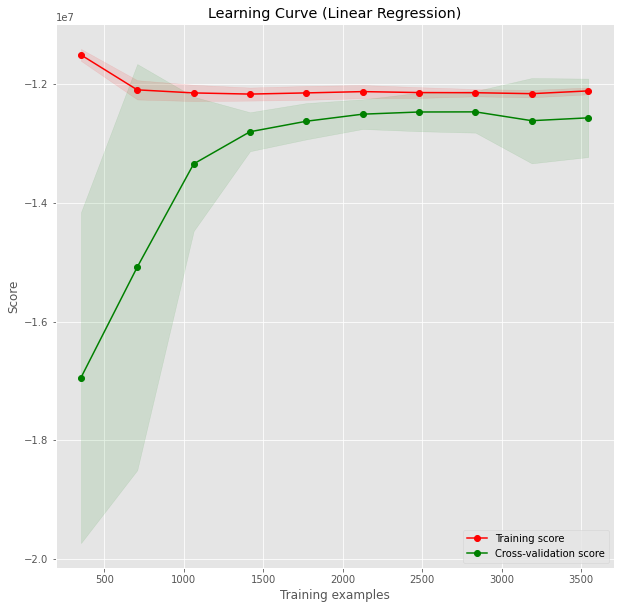

In [74]:
estimator = LinearRegression(normalize=True)
plot_learning_curve(estimator, "Learning Curve (Linear Regression)", X, y, cv=5)

As seen in the learning curve, the error in both training and validation data is too high, which translates into the presence of high bias. The Next steps we can take are:
* a more complex model
* a larger set of features

We will try again with a more complex model: AdaBoost

First, we are going to find the best hyperparameters, in this case, the number of estimators

In [75]:
model = GridSearchCV(AdaBoostRegressor(), {'n_estimators' : [10, 25, 30, 50, 75, 100]}, scoring=score_rmse)
model.fit(X_train, y_train)
model.best_params_, model.best_score_

({'n_estimators': 25}, -11302375.527576575)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

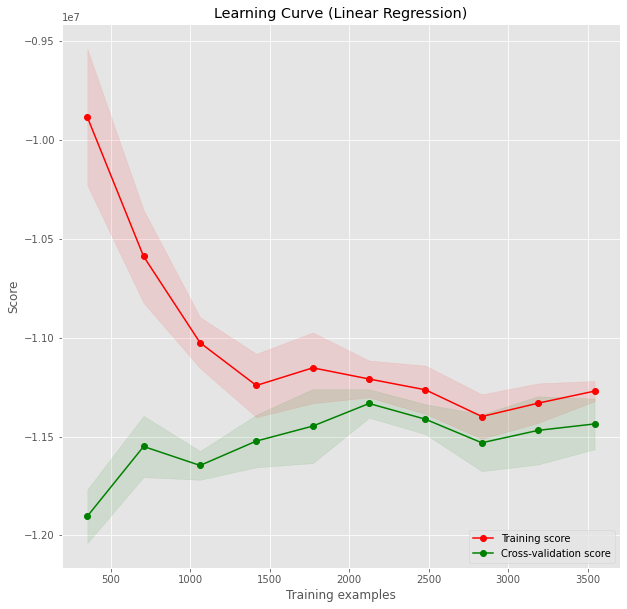

In [76]:
estimator = AdaBoostRegressor(n_estimators=10)
plot_learning_curve(estimator, "Learning Curve (AdaBoost)", X, y, cv=5)

We could improve improve the error both in train and validation, however, it still very high. So, we will try our second option: get more features.

## Getting more significant features with fft

We are going to obtain the same features as before, but now these will be taken from the Fourier Fast Transform and will join them with the statistical features that we already have.

In [77]:
fft_feats = [
    np.mean,
    np.std,
    np.max,
    np.min,
]

def get_fft_features(seg):
  """
      Returns a Series of different features from the csv.
  """

  # Format seg and read csv
  seg = str(seg)
  if not seg.endswith('.csv'): seg += '.csv'
  
  try:
    seg_df = pd.read_csv(train_dir + seg)
  except FileNotFoundError:
    seg_df = pd.read_csv(test_dir + seg)
  
  seg_df = seg_df.fillna(0)
  seg_df = seg_df.apply(np.fft.fft)
  seg_df = seg_df.apply(np.real)

  # Apply each func to each column and append in a Series for each func
  feats_series = [seg_df.apply(f).rename(index=lambda n : f"{n}_fft__{f.__name__}")
                                                              for f in fft_feats]
  # Return appended Series
  return functools.reduce(pd.Series.append, feats_series)


This gives us information on how much of a certain frequency the transform detects 

In [78]:
train_fft_data = train_df['segment_id'].apply(get_fft_features)
train_stat_data = train_df['segment_id'].apply(get_stat_features)
train_data = train_df.join(train_fft_data).join(train_stat_data)

In [79]:
X = train_data.drop(columns=['time_to_eruption', 'segment_id'])
y = train_data['time_to_eruption']
X_train, X_test, y_train, y_test = train_test_split(
                             X, y, test_size=0.33, random_state=1)

Testing LinearRegression and AdaBoost

array([-13213003.1183965 , -12615926.64893366, -12123342.46576279,
       -12411470.26335366, -12865660.80551507])

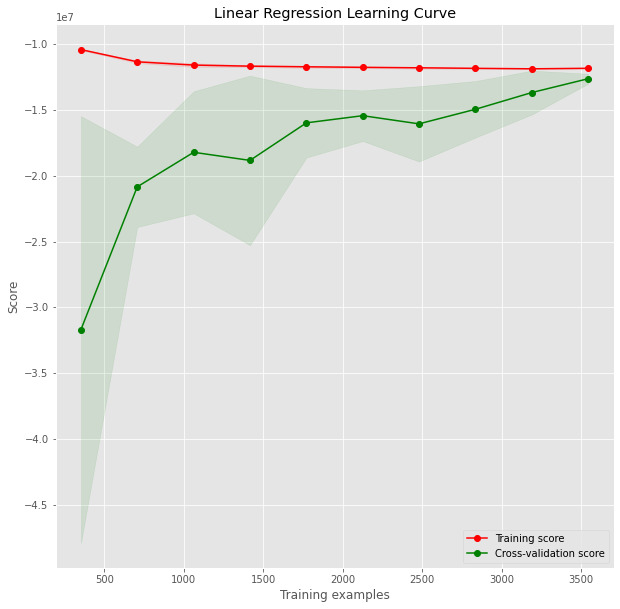

In [80]:
plot_learning_curve(LinearRegression(normalize=True), 
                    "Linear Regression Learning Curve", 
                    X, y, cv=5)
cross_val_score(LinearRegression(normalize=True), X, y, 
                scoring='neg_root_mean_squared_error')

array([-13656836.7988244 , -13327598.96259741, -13353876.68537623,
       -13653418.34888509, -13457254.84922067])

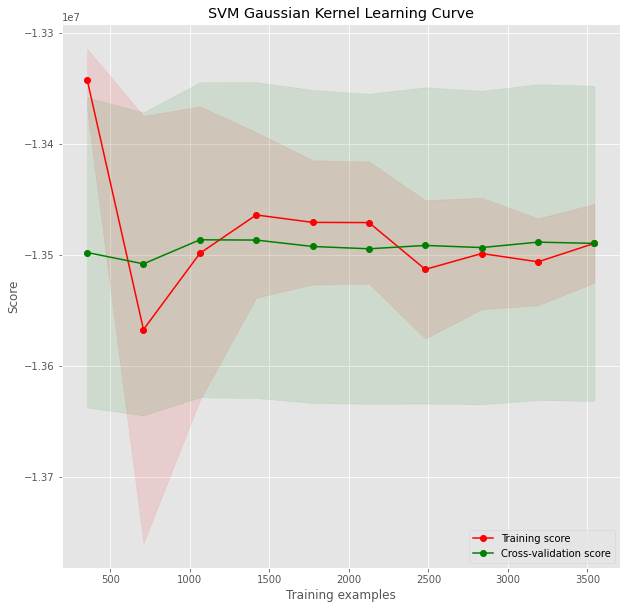

In [84]:
plot_learning_curve(SVR(kernel='rbf'), 
                    "SVM Gaussian Kernel Learning Curve", X, y, cv=5)
cross_val_score(SVR(kernel='rbf'), X, y, scoring='neg_root_mean_squared_error')

array([-11655721.95899713, -11598753.46976166, -11584441.64408464,
       -11545108.55327163, -11227508.66001968])

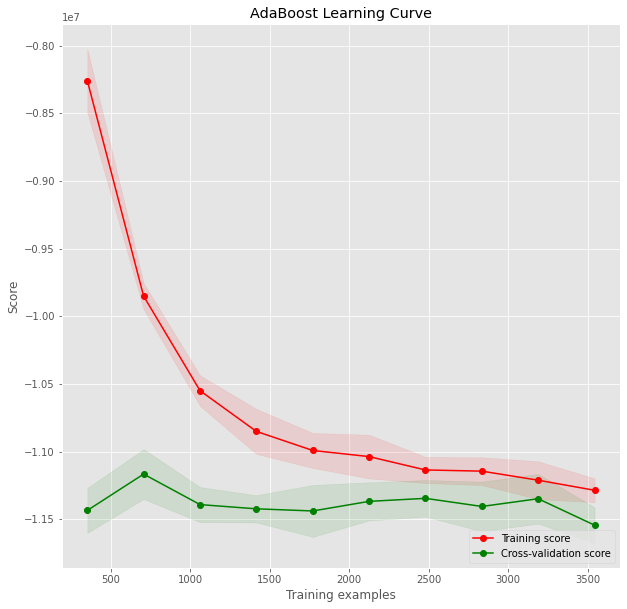

In [85]:
plot_learning_curve(AdaBoostRegressor(), "AdaBoost Learning Curve", X, y, cv=5)
cross_val_score(AdaBoostRegressor(), X, y, scoring='neg_root_mean_squared_error')

Since simple methods dont improve a lot with this features, lets test other ensemble methods

In [86]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

Optimal values for Random Forest Regressor

In [87]:
grid = GridSearchCV(RandomForestRegressor(), {'max_depth': [10, 20, 40], 'max_features': ['auto', 'sqrt', 'log2', 2, 5], 'bootstrap': [True, False]}, scoring=score_rmse)

grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

(-7037802.441815661,
 {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt'})

In [88]:
model = RandomForestRegressor(max_depth=20, bootstrap=False, max_features='sqrt').fit(X_train, y_train)
score_rmse(model, X_test, y_test), score_rmse(model, X_train, y_train)


(-6708069.321073647, -223647.95083118437)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

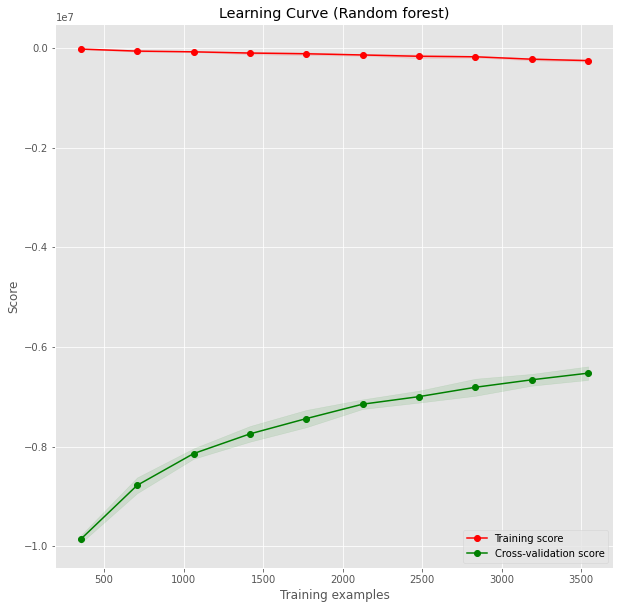

In [89]:
plot_learning_curve(model, "Learning Curve (Random forest)", X, y, cv=5)

As we saw a high performance gap, we have to make our model less complex, so lets reduce the number of features

## Reducing Features

We'll use Lasso to obtain the most significant features

In [90]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [91]:
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)
cross_val_score(LassoCV(), X, y, scoring='neg_root_mean_squared_error')

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.83829318e+01 3.04897030e+01 0.00000000e+00 4.72496403e-01
 0.00000000e+00 7.199068

array([-13451271.30971884, -12496321.30576377, -12401522.8966956 ,
       -12476533.75812211, -14163764.26893452])

As we see a lot of features are identified with importance zero, so we're taking those out

In [92]:
relevant_columns = np.array(train_data.drop(columns=['time_to_eruption', 'segment_id']).columns)[importance > 0]
relevant_columns

array(['sensor_1_fft__std', 'sensor_2_fft__std', 'sensor_4_fft__std',
       'sensor_6_fft__std', 'sensor_8_fft__std', 'sensor_1_fft__amax',
       'sensor_2_fft__amax', 'sensor_3_fft__amax', 'sensor_4_fft__amax',
       'sensor_6_fft__amax', 'sensor_7_fft__amax', 'sensor_8_fft__amax',
       'sensor_9_fft__amax', 'sensor_10_fft__amax', 'sensor_1_fft__amin',
       'sensor_2_fft__amin', 'sensor_3_fft__amin', 'sensor_4_fft__amin',
       'sensor_5_fft__amin', 'sensor_6_fft__amin', 'sensor_7_fft__amin',
       'sensor_8_fft__amin', 'sensor_9_fft__amin', 'sensor_10_fft__amin'],
      dtype=object)

In [93]:
X = train_data[relevant_columns]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
                                      X, y, test_size=0.33, random_state=1)

Looking for params in random forest regressor

In [95]:
model = GridSearchCV(RandomForestRegressor(), {'max_depth': [20, 40, 60], 'max_features': ['auto', 'sqrt', 'log2', 2, 5], 'bootstrap': [True, False]}, scoring=score_rmse)
model.fit(X_train, y_train)
model.best_params_, model.best_score_

({'bootstrap': False, 'max_depth': 40, 'max_features': 5}, -7170589.64996281)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

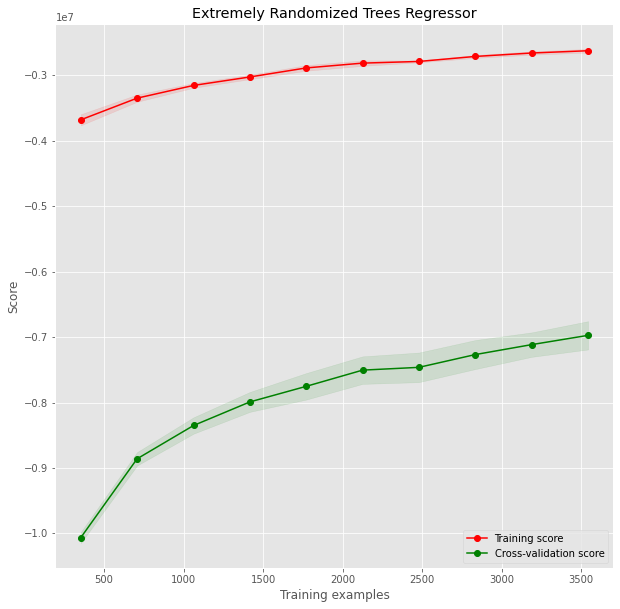

In [96]:
plot_learning_curve(RandomForestRegressor(n_estimators=75, max_features='auto'), 'Extremely Randomized Trees Regressor', X, y, cv=5)

In [97]:
model = GridSearchCV(ExtraTreesRegressor(), {'n_estimators': [90, 100], 'max_features': ['auto', 'sqrt', 'log2', 2, 5]}, scoring=score_rmse)
model.fit(X, y)
model.best_params_, model.best_score_

({'max_features': 'auto', 'n_estimators': 90}, -6595266.01790225)

In [98]:
import lightgbm

In [99]:
cross_val_score(lightgbm.LGBMRegressor(boosting_type='gbdt'), X, y, scoring='neg_root_mean_squared_error')

array([-6838697.80182407, -6681809.76031317, -6756433.22510068,
       -6992660.21994888, -6919808.8211829 ])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

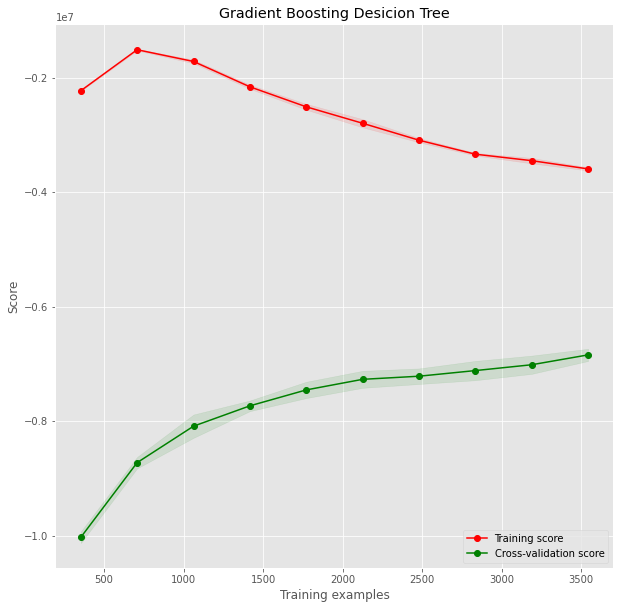

In [100]:
plot_learning_curve(lightgbm.LGBMRegressor(boosting_type='gbdt'), 'Gradient Boosting Desicion Tree', X, y, cv=5)

Since there keeps existing a performance gap, the models are still overfitting. We'll try to get more significant features by taking more features from Fourier Transform

## Getting main frequencies as features


Here we take the real positive part of the fft and find the five largest values for it, along with their corresponding frequencies

In [101]:
def get_fftfreq_features(seg):
  """
      Returns a Series of different features from the csv.
  """
  
  # Format seg and read csv
  seg = str(seg)
  if not seg.endswith('.csv'): seg += '.csv'
  
  try:
    seg_df = pd.read_csv(train_dir + seg)
  except FileNotFoundError:
    seg_df = pd.read_csv(test_dir + seg)
  
  seg_df = seg_df.fillna(0)

  fts = pd.Series()

  for sen in seg_df.columns:
    yf = np.abs(fft(np.array(seg_df[sen])))
    xf = fftfreq(y.size, d=1e-2)
    yf = yf[np.where(xf > 0)]
    xf = xf[np.where(xf > 0)]
    n = 5
    indices = np.argpartition(yf, len(yf) - n)[-n:]
    max_elements = yf[indices]
    max_elements_order = np.argsort(max_elements)
    ordered_indices = indices[max_elements_order]

    for num, i in enumerate(ordered_indices[::-1]):
      s = pd.Series(data=[yf[i], xf[i]], index=[f"{sen}_fft_ymax_{num+1}",
                                                f"{sen}_fft_xmax_{num+1}"])
      fts = fts.append(s)

  return fts


In [102]:
train_freq_df = train_df['segment_id'].apply(get_fftfreq_features)
train_freq_data = train_df.join(train_freq_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [103]:
train_data_all = train_data.join(train_freq_df)

We join it with all data we had before

In [104]:
X = np.array(train_data_all.drop(columns=['time_to_eruption', 'segment_id']))
y = np.array(train_data_all['time_to_eruption'])

Let's take an example and analyze it

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


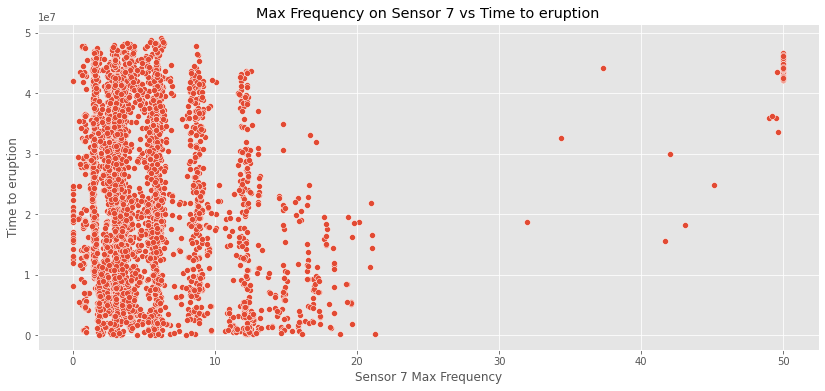

In [105]:
plt.figure(figsize=(14,6))
plt.title('Max Frequency on Sensor 7 vs Time to eruption')
plt.xlabel('Sensor 7 Max Frequency')
plt.ylabel('Time to eruption')
sns.scatterplot(train_freq_data['sensor_7_fft_xmax_1'], y)

It's not very clear, but there is a little tendency for the time to eruption to decrease when the maximum frequency on sensor seven goes up. We'll se how well it does.

In [106]:
# Testing cv score on random forest
cross_val_score(RandomForestRegressor(), X, y, scoring='neg_root_mean_squared_error')

array([-5797939.85164441, -5825988.65975639, -5640211.57174319,
       -5950087.90154521, -5540647.78744841])

In [107]:
# Testing cv score on gradient boosting
cross_val_score(lightgbm.LGBMRegressor(), X, y, scoring='neg_root_mean_squared_error')

array([-5253244.28717875, -5552112.91351454, -5392152.99620763,
       -5555084.30793054, -5376809.48640888])

We can check with learning curves how well our model is learning

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

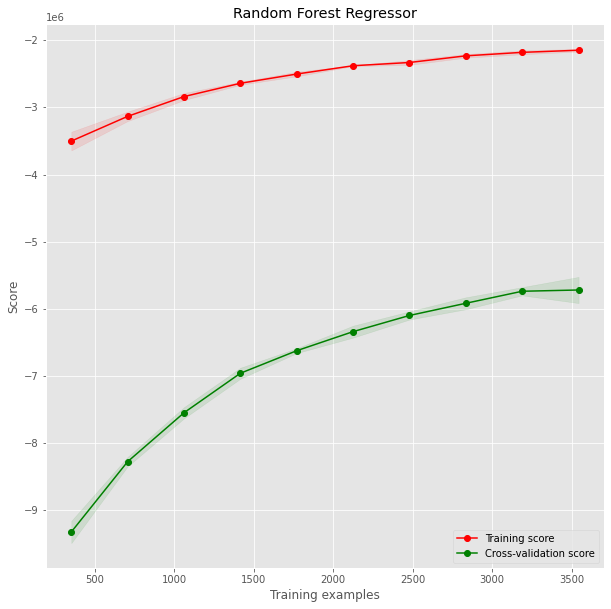

In [108]:
plot_learning_curve(RandomForestRegressor(), 'Random Forest Regressor', X, y)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

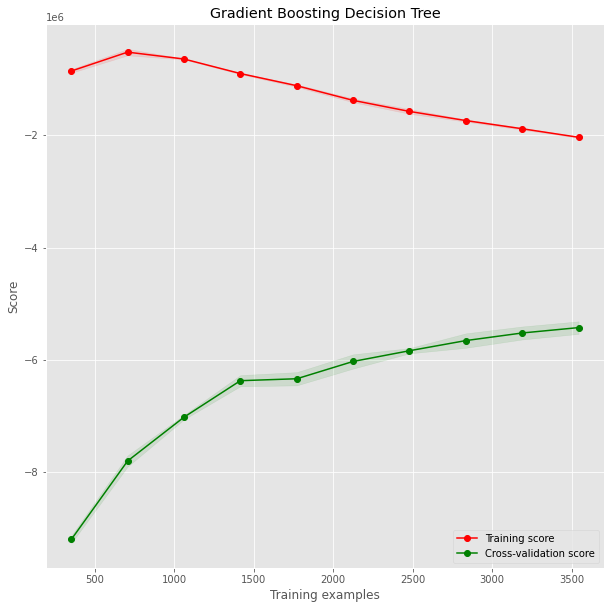

In [109]:
plot_learning_curve(lightgbm.LGBMRegressor(), 'Gradient Boosting Decision Tree', X, y)

As we see, although validation is smalles with this new set of features, there remains a huge difference between train and testing, so we can again try to simplify our model. In this case we can again reduce the set of features we are using.

In this case we can use an Extra Trees Regressor, which we can fit with our data and it can tell how much each feature affect the result.

In [110]:
clf = ExtraTreesRegressor().fit(X, y)

We can plot the distribution of feature importances so we can set a fair threshold.

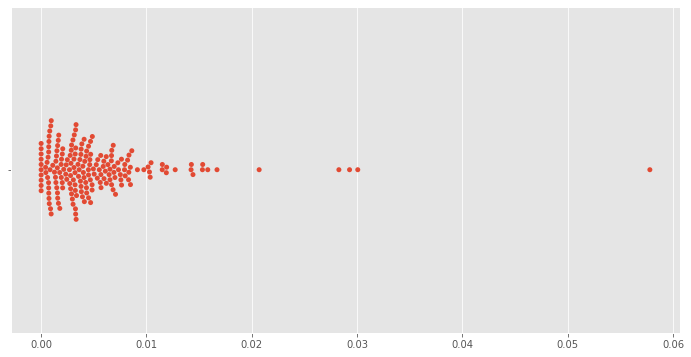

In [111]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=clf.feature_importances_)

There is a huge amount of features with an importance below 1e-2

In [112]:
selfm = SelectFromModel(clf, prefit=True, threshold=1e-2)
X_reduce = selfm.transform(X)

In [113]:
X_reduce.shape

(4431, 21)

We are left with only 20 features

In [114]:
grid = GridSearchCV(ExtraTreesRegressor(), {'n_estimators':[90, 100, 125, 150]}, scoring='neg_root_mean_squared_error')
grid.fit(X_reduce, y)
grid.best_params_, grid.best_score_

({'n_estimators': 150}, -5122171.342883649)

In [115]:
cross_val_score(ExtraTreesRegressor(n_estimators=125), X_reduce, y, scoring='neg_root_mean_squared_error', cv=5), 

(array([-5038555.38963625, -5031652.43960952, -5116701.51692886,
        -5250645.71508931, -5148133.93788511]),)

In [116]:
grid = GridSearchCV(RandomForestRegressor(), {'n_estimators':[90, 100, 125, 150]}, scoring='neg_root_mean_squared_error')
grid.fit(X_reduce, y)
grid.best_params_, grid.best_score_

({'n_estimators': 150}, -5600123.522014139)

In [118]:
cross_val_score(RandomForestRegressor(n_estimators=150), X_reduce, y, scoring='neg_root_mean_squared_error')

array([-5748208.20931007, -5501679.31124558, -5523446.56099017,
       -5817670.2441557 , -5344557.59596028])

Now are left with a model with a slightly higher bias but a much smaller set of features.

#Testing

Finally, we have to upload our final results to Kaggle. 

On December 07 2020, we were on 150th place on the leaderboard with a score of 5,947,706, not too far from the first place. The best entry had a mean absolute error of 3,843,230. We think its possible to keep improving our results and we will keep trying until the competition ends.

In [119]:
model = ExtraTreesRegressor(n_estimators=125).fit(X_reduce, y)

In [120]:
test_data = pd.read_csv('/content/test_data.csv')
test_freq_df = test_data['segment_id'].apply(get_fftfreq_features)
test_data_all = test_data.join(test_freq_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [121]:
X_final_test = np.array(test_data_all.drop(columns=['time_to_eruption', 'segment_id']))
predict = model.predict(selfm.transform(X_final_test))

In [122]:
test_df = pd.read_csv('/content/data/sample_submission.csv')
results = pd.DataFrame({'segment_id' : test_df['segment_id'], 'time_to_eruption' : predict})

In [123]:
results

,segment_id,time_to_eruption
0,1000213997,2.283651e+07
1,100023368,4.071190e+07
2,1000488999,1.674376e+07
3,1001028887,2.333310e+07
4,1001857862,1.269763e+07
...,...,...
4515,996704281,2.662372e+07
4516,997630809,1.430109e+07
4517,998072137,1.616958e+07
4518,998136924,3.568598e+07


In [124]:
results.to_csv('results.csv', index=False)

In [125]:
!kaggle competitions submit -c predict-volcanic-eruptions-ingv-oe -f results.csv -m "Random Forest"

100% 102k/102k [00:01<00:00, 59.9kB/s]
Successfully submitted to INGV - Volcanic Eruption Prediction